## Kmeans

In [3]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings

warnings.filterwarnings("ignore")

In [6]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype=np.float64)

In [8]:
data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)

In [9]:
data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

In [10]:
data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [13]:
data.shape

(150, 2)

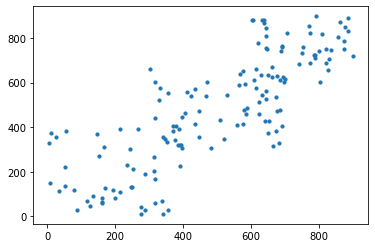

In [18]:
plt.scatter(data[:, 0], data[:, 1], s = 10)

In [19]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])

In [20]:
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [21]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
df = pd.DataFrame({'data_x': data[:, 0], 'data_y': data[:, 1],
                    'labels': labels})

In [24]:
df.sample(10)

,data_x,data_y,labels
115,788.0,722.0,2
146,773.0,822.0,2
92,624.0,458.0,1
83,318.0,602.0,1
97,469.0,538.0,1
49,247.0,134.0,0
40,236.0,232.0,0
105,661.0,672.0,2
52,318.0,441.0,1
90,624.0,512.0,1


In [25]:
colors = ['green', 'blue', 'purple']

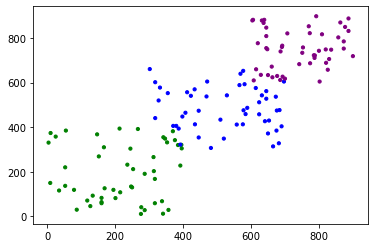

In [26]:
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s = 10, 
            cmap = matplotlib.colors.ListedColormap(colors))

In [27]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [28]:
kmeans_model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
centroids = kmeans_model.cluster_centers_

In [30]:
centroids

array([[492.875     , 452.42857143],
       [732.05660377, 744.16981132],
       [189.63414634, 164.09756098]])

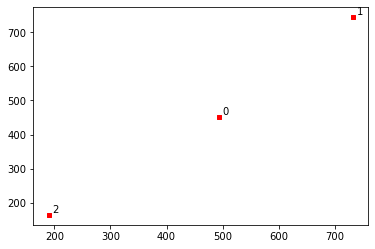

In [33]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=10, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=10)

In [34]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

Homogeneity_score:  0.7802305031588119


In [35]:
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

Completeness_score:  0.7864256777342927


In [36]:
print("V_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

V_measure_score:  0.7833158413683919


In [38]:
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

Adjusted_rand_score:  0.781408617837941


In [39]:
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

Adjusted_mutual_info_score:  0.7805920672468842


In [41]:
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Silhouette_score:  0.47903379552680586


In [43]:
kmeans_model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])